# Molecular class --> Superclass map is now in 

In [90]:
import json

import seaborn as sns
import pandas as pd

In [91]:
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')

## Vanessa's LipidGenie Lipid Superclass Color Scheme 
- purple = glycerolipid = TG, DG, alk-DG
- red = fatty acyl
- gray = unidentified
- blue = sterol lipid
- yellow = sphingolipid
- green = phospholipid

# Color palette ideas:


In [96]:
sns.color_palette('husl', 4)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727)]

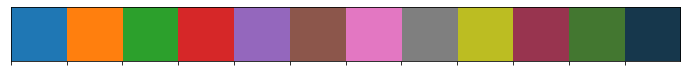

In [79]:
# # 0 = Blue         Sterol lipid
# 1 = Orange       Sphingolipid
# 2 = Green        Phospholipid
# 3 = Red          FA
# 4 = Purple       Glycerolipid
# 5 = Brown        Carboxylic Acid
# 6 = Pink         Amino Acid
# 7 = Gray         Unidentified
# 8 = Olive green  Amine/Amide/Ammonium/N-heterocycle
# 9 = Maroon-ish   Other Metabolite

p = sns.color_palette(n_colors=9)
p.append(sns.color_palette('twilight_r', n_colors=15)[4])  # Add maroon
p.append(sns.color_palette('cubehelix', 15)[5])
p.append(sns.color_palette('cubehelix', 15)[2])
sns.palplot(p)
lipid_class_colormap = {
    # LIPID SUPERCLASSES
    'Glycerolipid': p[4],
    'Sterol Lipid': p[0],
    'Sphingolipid': p[1],
    'Phospholipid': p[2],
    'Fatty Acyl'  : p[3],
    # LIPIDS
    "TG"          : p[4],
    "Alkenyl-DG"  : p[4],
    "AC"          : p[3],
    "FA"          : p[3],
    "CE"          : p[0],
    "SM"          : p[1],
    "Cer[NS]"     : p[1],
    "LysoPE"      : p[2],
    "LysoPC"      : p[2],
    "PC"          : p[2],
    "PI"          : p[2],
    "Plasmenyl-PC": p[2],
    "Plasmanyl-PC": p[2],
    "Plasmenyl-PE": p[2],
    "PE"          : p[2],
    "Plasmanyl-PE": p[2],
    
    # ALL UNKNOWNS MAP TO GRAY
    'Unidentified': p[7],
}

# superclass_colormap = {}
# for subdict in lipid_class_colormap.values():
#     superclass = subdict['superclass']
#     superclass_colormap[superclass] = subdict['color']
# display('superclass_colormap: ', superclass_colormap)

# print(" ".join([superclass[:6] for superclass in superclass_colormap]))

# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})

# Write class_colormap to file 
# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'w') as outfile:
#     json.dump(class_colormap, outfile)

## Metabolites color scheme

array(['Unidentified', 'Nitrogen heterocycle', 'Amino acid',
       'Organic acid', 'Carbohydrate', 'Amino acid derivative', 'Alcohol'],
      dtype=object)

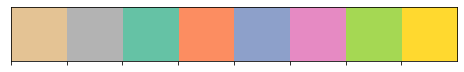

In [86]:
display(data.loc[data['Type'] == 'metabolite', 'molec_class'].unique())




# Another option for colormap 
# metabolite_class_colormap = {
#     "Nitrogen heterocycle" : p[10],
#     "Amino acid"           : p[6],
#     "Organic acid"         : p[5],
#     "Carbohydrate"         : p[8],
#     "Amino acid derivative": p[9],
#     "Alcohol"              : p[11],
# }
# sns.palplot(metabolite_class_colormap.values())

# The 'Set2' color palette is quite muted compared to the lipid superclasses
metab_colors = sns.color_palette('Set2', 14, desat=1)[6:]
sns.palplot(metab_colors)
metabolite_class_colormap = {
    "Nitrogen heterocycle" : metab_colors[2],
    "Amino acid"           : metab_colors[3],
    "Organic acid"         : metab_colors[0],
    "Carbohydrate"         : metab_colors[4],
    "Amino acid derivative": metab_colors[5],
    "Alcohol"              : metab_colors[6],
}

# metabolite_class_colormap = {
#     "nitrogen heterocycle"  : {'color': metab_colors[2], 'superclass': 'nitrogen heterocycle'},
#     "amino acid"            : {'color': metab_colors[3], 'superclass': 'amino acid'},
#     "organic acid"          : {'color': metab_colors[0], 'superclass': 'organic acid'},
#     "carbohydrate"          : {'color': metab_colors[4], 'superclass': 'carbohydrate'},
#     "amino acid derivative" : {'color': metab_colors[5], 'superclass': 'amino acid derivative'},
#     "alcohol"               : {'color': metab_colors[1], 'superclass': 'alcohol'},  
# }

# metabolite_superclass_colormap = {x: metabolite_class_colormap[x]['color'] for x in metabolite_class_colormap}

In [87]:
lm_pal = sns.color_palette('Set2', n_colors=2)
# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
print('LIPID   METAB')
display(lm_pal)
lipid_metab_colormap = {'lipid': lm_pal[0], 
                        'metabolite': lm_pal[1]}

# print('  RBG   FBG  IMPAIR DIAB.  NORMAL')
display(sns.color_palette('colorblind', 10))
blindcolor = sns.color_palette('colorblind', 10)
rbg_color = blindcolor[0]
fbg_color = blindcolor[1]
normal_color = blindcolor[2]
impaired_color = blindcolor[4]
diabetic_color = blindcolor[3]

metadata_colormap = {'FBG':      fbg_color,
                     'RBG':      rbg_color,
                     'normal':   normal_color,
                     'impaired': impaired_color,
                     'diabetic': diabetic_color}

LIPID   METAB


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Color Nile rats by OGTT glucose rank using a uniform perception color map (e.g. viridis)

In [88]:
cmap = sns.color_palette('viridis', 10)  # twilight_shifted  coolwarm
display(cmap)

ogtt_rank = ap.loc[ap['lcms_sampled'], 'OGTT (AUC)'].sort_values().index

d1 = {str(animal):   color for animal, color in zip(ogtt_rank, cmap)}
d2 = {float(animal): color for animal, color in zip(ogtt_rank, cmap)}
animal_colormap = {**d1, **d2}   # Make string and float version of animal numbers for redundancy
# animal_colormap

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

# combine all color maps and save to json file

In [89]:
combined_colormaps = {
    **lipid_metab_colormap, 
    **lipid_class_colormap,
    **metabolite_class_colormap,
    **metadata_colormap, 
    **superclass_colormap, 
    **animal_colormap,
#     **class_colormap,
#     'all_superclass_colors': {**superclass_colormap, **metabolite_superclass_colormap},
}
# display(combined_colormaps)

with open(r'..\data\metadata\color_schemes.json', 'w') as outfile:
    json.dump(combined_colormaps, outfile, indent=2)

In [71]:
# class_to_superclass_map = {key: val[-1] for key, val in class_colormap.items(),}
# display(class_to_superclass_map)

# with open(r'..\data\metadata\class_to_superclass_map.json', 'w') as outfile:
#     json.dump(class_to_superclass_map, outfile, indent=2)

## Assigning a unique color to each Rat is also possible, but not really important

In [74]:
# animal_colors = sns.color_palette('tab10')
# animal_colormap = {animal: color for animal, color in zip([1091,1093,
#                                                            1060,1062,1074,1092,1102,
#                                                            1076,1082,1101], animal_colors)}
# # for animal in animal_colormap:
# print(" ", "   ".join([str(animal) for animal in animal_colormap]))
# sns.palplot([color for color in animal_colormap.values()])

## Make a color scheme for the 4 litters the Nile rats were born in 

In [75]:
# # Grey/brown/violet/blue
# litter_colors = sns.palplot(sns.color_palette('Accent_r', 9))
# # sns.palplot(litter_colors)
# # litter_colormap = {litter_number: color for litter_number, color in zip(range(4), litter_colors[:4])}

# # Greys 
# litter_colors = pd.Series(sns.color_palette('Greys', 5))
# litter_colormap = {litter_number: color for litter_number, color in zip([0,1,2,3], litter_colors.loc[1:])}
# sns.palplot(litter_colormap.values())

# Playing with color schemes

## Color scheme from Bang Wong (Nature Methods, 2011) 

https://www.nature.com/articles/nmeth.1618

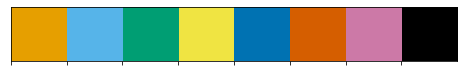

In [77]:
cb = [[230, 159, 0], # orange
      [86, 180, 233], # skyblue
      [0, 158, 115], # Blueish Green
      [240, 228, 66],# Yellow
      [0, 114, 178], # Blue
      [213, 94, 0],  # Vermillion
      [204, 121, 167], # Reddish purple
      [0,0,0]] # Black
for i, c in enumerate(cb): 
    for j, h in enumerate(c):
        cb[i][j] = h/255
sns.palplot(cb)

In [97]:
pals = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
        'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
        'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
        'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
        'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
        'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
        'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
        'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
        'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
        'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
        'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
        'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
        'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
        'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
        'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
        'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
        'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
        'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
        'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
for pal in pals:
    try:
        print(pal)
        display(sns.color_palette(pal, n_colors=4))
    except ValueError:
        pass

Accent


[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6)]

Accent_r


[(0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (1.0, 1.0, 0.6),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079)]

Blues


[(0.8141176470588235, 0.883921568627451, 0.9498039215686275),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.09019607843137256, 0.39294117647058824, 0.6705882352941177)]

Blues_r


[(0.09019607843137256, 0.39294117647058824, 0.6705882352941177),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.8141176470588235, 0.883921568627451, 0.9498039215686275)]

BrBG


[(0.7490196078431373, 0.5058823529411764, 0.17647058823529413),
 (0.9647058823529412, 0.9098039215686274, 0.7647058823529411),
 (0.7803921568627453, 0.9176470588235294, 0.8980392156862746),
 (0.207843137254902, 0.592156862745098, 0.5607843137254902)]

BrBG_r


[(0.20784313725490214, 0.5921568627450982, 0.5607843137254903),
 (0.7803921568627453, 0.9176470588235294, 0.8980392156862746),
 (0.9647058823529412, 0.9098039215686274, 0.7647058823529411),
 (0.7490196078431373, 0.5058823529411764, 0.1764705882352941)]

BuGn


[(0.8392156862745098, 0.939607843137255, 0.9317647058823529),
 (0.5599999999999999, 0.8298039215686275, 0.7592156862745097),
 (0.283921568627451, 0.6980392156862745, 0.4988235294117647),
 (0.0823529411764706, 0.49803921568627446, 0.23137254901960783)]

BuGn_r


[(0.08235294117647059, 0.49803921568627446, 0.23137254901960783),
 (0.283921568627451, 0.6980392156862745, 0.4988235294117647),
 (0.56, 0.8298039215686275, 0.7592156862745099),
 (0.8392156862745098, 0.939607843137255, 0.9317647058823529)]

BuPu


[(0.8007843137254902, 0.8666666666666667, 0.923921568627451),
 (0.6054901960784314, 0.7074509803921569, 0.8392156862745098),
 (0.5490196078431373, 0.45333333333333337, 0.7105882352941176),
 (0.5223529411764706, 0.1764705882352941, 0.563921568627451)]

BuPu_r


[(0.5223529411764706, 0.1764705882352941, 0.563921568627451),
 (0.5490196078431373, 0.45333333333333337, 0.7105882352941176),
 (0.6054901960784314, 0.7074509803921569, 0.8392156862745098),
 (0.8007843137254902, 0.8666666666666667, 0.923921568627451)]

CMRmap


[(0.24, 0.15, 0.65),
 (0.6799999999999999, 0.21000000000000002, 0.43),
 (0.92, 0.45, 0.03),
 (0.9, 0.81, 0.26)]

CMRmap_r


[(0.9, 0.81, 0.26),
 (0.92, 0.45, 0.03),
 (0.6799999999999999, 0.21000000000000002, 0.42999999999999994),
 (0.24, 0.15, 0.65)]

Dark2


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353)]

Dark2_r


[(0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

GnBu


[(0.8313725490196079, 0.9341176470588235, 0.8070588235294117),
 (0.6235294117647059, 0.8533333333333334, 0.7215686274509804),
 (0.3411764705882353, 0.7215686274509804, 0.8156862745098039),
 (0.11372549019607844, 0.49254901960784314, 0.7168627450980393)]

GnBu_r


[(0.11372549019607843, 0.49254901960784314, 0.7168627450980393),
 (0.3411764705882353, 0.7215686274509804, 0.8156862745098039),
 (0.6235294117647059, 0.8533333333333334, 0.7215686274509804),
 (0.8313725490196079, 0.9341176470588235, 0.8070588235294117)]

Greens


[(0.8274509803921569, 0.9325490196078431, 0.8031372549019608),
 (0.596078431372549, 0.8345098039215686, 0.5788235294117646),
 (0.2949019607843137, 0.6901960784313725, 0.38431372549019605),
 (0.0823529411764706, 0.49803921568627446, 0.23137254901960783)]

Greens_r


[(0.08235294117647059, 0.49803921568627446, 0.23137254901960783),
 (0.29490196078431374, 0.6901960784313725, 0.38431372549019605),
 (0.596078431372549, 0.8345098039215686, 0.5788235294117647),
 (0.8274509803921569, 0.9325490196078431, 0.8031372549019608)]

Greys


[(0.8870588235294118, 0.8870588235294118, 0.8870588235294118),
 (0.7105882352941176, 0.7105882352941176, 0.7105882352941176),
 (0.47843137254901963, 0.47843137254901963, 0.47843137254901963),
 (0.25098039215686274, 0.25098039215686274, 0.25098039215686274)]

Greys_r


[(0.25098039215686274, 0.25098039215686274, 0.25098039215686274),
 (0.47843137254901963, 0.47843137254901963, 0.47843137254901963),
 (0.7105882352941177, 0.7105882352941177, 0.7105882352941177),
 (0.8870588235294118, 0.8870588235294118, 0.8870588235294118)]

OrRd


[(0.9937254901960785, 0.8627450980392157, 0.6854901960784314),
 (0.9913725490196079, 0.6972549019607843, 0.483921568627451),
 (0.9474509803921569, 0.42745098039215684, 0.2956862745098039),
 (0.7866666666666666, 0.11294117647058823, 0.07294117647058823)]

OrRd_r


[(0.7866666666666666, 0.11294117647058823, 0.07294117647058823),
 (0.9474509803921569, 0.42745098039215684, 0.2956862745098039),
 (0.9913725490196079, 0.6972549019607843, 0.48392156862745106),
 (0.9937254901960785, 0.8627450980392157, 0.6854901960784314)]

Oranges


[(0.9937254901960785, 0.8501960784313726, 0.7043137254901961),
 (0.9921568627450981, 0.6564705882352941, 0.3827450980392157),
 (0.9545098039215686, 0.44, 0.10666666666666666),
 (0.7709803921568628, 0.2541176470588235, 0.007058823529411764)]

Oranges_r


[(0.7709803921568628, 0.2541176470588235, 0.007058823529411764),
 (0.9545098039215686, 0.44, 0.10666666666666666),
 (0.9921568627450981, 0.6564705882352941, 0.3827450980392157),
 (0.9937254901960785, 0.8501960784313726, 0.7043137254901961)]

PRGn


[(0.6, 0.4392156862745098, 0.6705882352941176),
 (0.9058823529411765, 0.8313725490196079, 0.9098039215686274),
 (0.8509803921568628, 0.9411764705882353, 0.827450980392157),
 (0.35294117647058826, 0.6823529411764706, 0.3803921568627451)]

PRGn_r


[(0.3529411764705884, 0.6823529411764707, 0.3803921568627452),
 (0.8509803921568628, 0.9411764705882353, 0.8274509803921569),
 (0.9058823529411765, 0.8313725490196079, 0.9098039215686274),
 (0.6, 0.4392156862745098, 0.6705882352941176)]

Paired


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313)]

Paired_r


[(0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 0.4980392156862745, 0.0),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)]

Pastel1


[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236)]

Pastel1_r


[(0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (1.0, 1.0, 0.8),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725)]

Pastel2


[(0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236)]

Pastel2_r


[(0.9450980392156862, 0.8862745098039215, 0.8),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

PiYG


[(0.8705882352941177, 0.4666666666666667, 0.6823529411764706),
 (0.9921568627450981, 0.8784313725490196, 0.9372549019607843),
 (0.9019607843137256, 0.9607843137254902, 0.8156862745098041),
 (0.4980392156862745, 0.7372549019607844, 0.2549019607843137)]

PiYG_r


[(0.49803921568627463, 0.7372549019607845, 0.2549019607843139),
 (0.9019607843137256, 0.9607843137254902, 0.8156862745098041),
 (0.9921568627450981, 0.8784313725490196, 0.9372549019607843),
 (0.8705882352941177, 0.4666666666666667, 0.6823529411764706)]

PuBu


[(0.8596078431372549, 0.8541176470588235, 0.9207843137254902),
 (0.611764705882353, 0.7254901960784313, 0.8494117647058823),
 (0.2603921568627451, 0.584313725490196, 0.7647058823529411),
 (0.01803921568627451, 0.4047058823529412, 0.6352941176470588)]

PuBuGn


[(0.8596078431372549, 0.8462745098039215, 0.9176470588235294),
 (0.6015686274509804, 0.7254901960784313, 0.8494117647058823),
 (0.25019607843137254, 0.584313725490196, 0.7647058823529411),
 (0.006274509803921568, 0.4729411764705882, 0.46431372549019606)]

PuBuGn_r


[(0.006274509803921568, 0.4729411764705882, 0.46431372549019606),
 (0.25019607843137254, 0.5843137254901961, 0.7647058823529411),
 (0.6015686274509804, 0.7254901960784313, 0.8494117647058823),
 (0.8596078431372549, 0.8462745098039215, 0.9176470588235294)]

PuBu_r


[(0.01803921568627451, 0.4047058823529412, 0.6352941176470588),
 (0.2603921568627451, 0.5843137254901961, 0.7647058823529411),
 (0.611764705882353, 0.7254901960784313, 0.8494117647058823),
 (0.8596078431372549, 0.8541176470588235, 0.9207843137254902)]

PuOr


[(0.8784313725490196, 0.5098039215686274, 0.0784313725490196),
 (0.996078431372549, 0.8784313725490196, 0.7137254901960784),
 (0.8470588235294119, 0.8549019607843138, 0.9215686274509804),
 (0.5019607843137255, 0.45098039215686275, 0.6745098039215687)]

PuOr_r


[(0.5019607843137256, 0.45098039215686286, 0.6745098039215688),
 (0.8470588235294119, 0.8549019607843138, 0.9215686274509803),
 (0.996078431372549, 0.8784313725490196, 0.7137254901960784),
 (0.8784313725490196, 0.5098039215686274, 0.0784313725490196)]

PuRd


[(0.8611764705882353, 0.788235294117647, 0.8878431372549019),
 (0.8054901960784313, 0.5435294117647059, 0.7623529411764706),
 (0.899607843137255, 0.20784313725490194, 0.5709803921568627),
 (0.7231372549019608, 0.042352941176470586, 0.3074509803921569)]

PuRd_r


[(0.7231372549019608, 0.042352941176470586, 0.3074509803921569),
 (0.899607843137255, 0.20784313725490197, 0.5709803921568627),
 (0.8054901960784313, 0.5435294117647059, 0.7623529411764706),
 (0.8611764705882353, 0.788235294117647, 0.8878431372549019)]

Purples


[(0.8878431372549019, 0.8847058823529411, 0.9372549019607843),
 (0.7137254901960784, 0.7137254901960784, 0.8470588235294118),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.3811764705882353, 0.25176470588235295, 0.6078431372549019)]

Purples_r


[(0.3811764705882353, 0.25176470588235295, 0.6078431372549019),
 (0.5254901960784314, 0.5129411764705882, 0.7403921568627451),
 (0.7137254901960784, 0.7137254901960784, 0.8470588235294118),
 (0.8878431372549019, 0.8847058823529411, 0.9372549019607843)]

RdBu


[(0.8392156862745098, 0.3764705882352941, 0.30196078431372547),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.8196078431372551, 0.8980392156862746, 0.9411764705882353),
 (0.2627450980392157, 0.5764705882352941, 0.7647058823529411)]

RdBu_r


[(0.26274509803921586, 0.5764705882352942, 0.7647058823529412),
 (0.819607843137255, 0.8980392156862746, 0.9411764705882353),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.8392156862745098, 0.3764705882352941, 0.30196078431372547)]

RdGy


[(0.8392156862745098, 0.3764705882352941, 0.30196078431372547),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.8784313725490197, 0.8784313725490197, 0.8784313725490197),
 (0.5294117647058824, 0.5294117647058824, 0.5294117647058824)]

RdGy_r


[(0.5294117647058825, 0.5294117647058825, 0.5294117647058825),
 (0.8784313725490197, 0.8784313725490197, 0.8784313725490197),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.8392156862745098, 0.3764705882352941, 0.30196078431372547)]

RdPu


[(0.9898039215686275, 0.8149019607843138, 0.7984313725490196),
 (0.9780392156862745, 0.5803921568627451, 0.6941176470588235),
 (0.8870588235294118, 0.24470588235294116, 0.6),
 (0.6007843137254902, 0.00392156862745098, 0.4831372549019608)]

RdPu_r


[(0.6007843137254902, 0.00392156862745098, 0.4831372549019608),
 (0.8870588235294118, 0.24470588235294116, 0.6),
 (0.9780392156862745, 0.5803921568627451, 0.6941176470588235),
 (0.9898039215686275, 0.8149019607843138, 0.7984313725490196)]

RdYlBu


[(0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.996078431372549, 0.8784313725490196, 0.5647058823529412),
 (0.8784313725490197, 0.9529411764705882, 0.9725490196078429),
 (0.4549019607843137, 0.6784313725490196, 0.8196078431372549)]

RdYlBu_r


[(0.45490196078431383, 0.6784313725490198, 0.8196078431372549),
 (0.8784313725490197, 0.9529411764705882, 0.9725490196078429),
 (0.996078431372549, 0.8784313725490196, 0.5647058823529412),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)]

RdYlGn


[(0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.8509803921568628, 0.9372549019607844, 0.5450980392156864),
 (0.4, 0.7411764705882353, 0.38823529411764707)]

RdYlGn_r


[(0.4000000000000002, 0.7411764705882354, 0.38823529411764707),
 (0.8509803921568628, 0.9372549019607844, 0.5450980392156864),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)]

Reds


[(0.9913725490196079, 0.7913725490196079, 0.7082352941176471),
 (0.9874509803921568, 0.5411764705882353, 0.41568627450980394),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.7364705882352941, 0.08, 0.10117647058823528)]

Reds_r


[(0.7364705882352941, 0.08, 0.10117647058823528),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.9874509803921568, 0.5411764705882353, 0.41568627450980394),
 (0.9913725490196079, 0.7913725490196079, 0.7082352941176471)]

Set1


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098)]

Set1_r


[(0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (1.0, 1.0, 0.2),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

Set2


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

Set2_r


[(0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

Set3


[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118)]

Set3_r


[(0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137)]

Spectral


[(0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

Spectral_r


[(0.4000000000000002, 0.7607843137254903, 0.6470588235294118),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725492),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)]

Wistia


[(0.9788235294117648, 0.927843137254902, 0.1772549019607843),
 (1.0, 0.8086274509803921, 0.0407843137254902),
 (1.0, 0.6956862745098039, 0.0),
 (0.9976470588235294, 0.6015686274509804, 0.0)]

Wistia_r


[(0.9976470588235294, 0.6015686274509804, 0.0),
 (1.0, 0.6956862745098039, 0.0),
 (1.0, 0.8086274509803921, 0.0407843137254902),
 (0.9788235294117648, 0.927843137254902, 0.1772549019607843)]

YlGn


[(0.8980392156862745, 0.96, 0.6737254901960784),
 (0.6368627450980392, 0.8486274509803922, 0.5403921568627451),
 (0.29803921568627445, 0.6917647058823528, 0.38666666666666666),
 (0.0823529411764706, 0.47372549019607846, 0.24392156862745099)]

YlGnBu


[(0.84, 0.9372549019607843, 0.7011764705882353),
 (0.44941176470588234, 0.7858823529411765, 0.7403921568627451),
 (0.14196078431372547, 0.5976470588235294, 0.756078431372549),
 (0.1380392156862745, 0.3027450980392157, 0.6274509803921569)]

YlGnBu_r


[(0.1380392156862745, 0.3027450980392157, 0.6274509803921569),
 (0.1419607843137255, 0.5976470588235294, 0.756078431372549),
 (0.4494117647058824, 0.7858823529411765, 0.7403921568627451),
 (0.84, 0.9372549019607843, 0.7011764705882353)]

YlGn_r


[(0.08235294117647059, 0.47372549019607846, 0.24392156862745099),
 (0.2980392156862745, 0.691764705882353, 0.38666666666666666),
 (0.6368627450980393, 0.8486274509803922, 0.5403921568627451),
 (0.8980392156862745, 0.96, 0.6737254901960784)]

YlOrBr


[(0.9976470588235294, 0.9215686274509803, 0.636078431372549),
 (0.996078431372549, 0.7349019607843138, 0.28),
 (0.939607843137255, 0.4713725490196078, 0.09490196078431372),
 (0.72, 0.2603921568627451, 0.010980392156862745)]

YlOrBr_r


[(0.72, 0.2603921568627451, 0.010980392156862745),
 (0.939607843137255, 0.47137254901960784, 0.09490196078431373),
 (0.996078431372549, 0.7349019607843138, 0.28),
 (0.9976470588235294, 0.9215686274509803, 0.636078431372549)]

YlOrRd


[(0.9976470588235294, 0.8823529411764706, 0.5286274509803922),
 (0.9952941176470589, 0.6690196078431372, 0.28549019607843135),
 (0.9890196078431372, 0.35529411764705887, 0.17882352941176471),
 (0.8305882352941176, 0.06117647058823529, 0.12549019607843137)]

YlOrRd_r


[(0.8305882352941176, 0.06117647058823529, 0.12549019607843137),
 (0.9890196078431372, 0.35529411764705887, 0.17882352941176471),
 (0.9952941176470589, 0.6690196078431372, 0.2854901960784314),
 (0.9976470588235294, 0.8823529411764706, 0.5286274509803922)]

afmhot


[(0.4, 0.0, 0.0),
 (0.8, 0.30000000000000004, 0.0),
 (1.0, 0.7, 0.19999999999999996),
 (1.0, 1.0, 0.6000000000000001)]

afmhot_r


[(1.0, 1.0, 0.6000000000000001),
 (1.0, 0.7, 0.19999999999999996),
 (0.8, 0.30000000000000004, 0.0),
 (0.3999999999999999, 0.0, 0.0)]

autumn


[(1.0, 0.2, 0.0), (1.0, 0.4, 0.0), (1.0, 0.6, 0.0), (1.0, 0.8, 0.0)]

autumn_r


[(1.0, 0.8, 0.0),
 (1.0, 0.6, 0.0),
 (1.0, 0.4, 0.0),
 (1.0, 0.19999999999999996, 0.0)]

binary


[(0.8, 0.8, 0.8),
 (0.6, 0.6, 0.6),
 (0.4, 0.4, 0.4),
 (0.19999999999999996, 0.19999999999999996, 0.19999999999999996)]

binary_r


[(0.2, 0.2, 0.2), (0.4, 0.4, 0.4), (0.6, 0.6, 0.6), (0.8, 0.8, 0.8)]

bone


[(0.17500000000000002, 0.17499993152167065, 0.24347826086956523),
 (0.35000000000000003, 0.3614583209634784, 0.4749998818750679),
 (0.525, 0.6020832799479201, 0.6499999212500452),
 (0.7265624015624016, 0.825, 0.8249999606250226)]

bone_r


[(0.7265624015624015, 0.825, 0.8249999606250227),
 (0.5249999999999999, 0.6020832799479201, 0.6499999212500454),
 (0.35, 0.3614583209634785, 0.47499988187506803),
 (0.175, 0.1749999315216707, 0.24347826086956528)]

brg


[(0.4, 0.0, 0.6),
 (0.8, 0.0, 0.19999999999999996),
 (0.8, 0.2, 0.0),
 (0.4, 0.6, 0.0)]

brg_r


[(0.4, 0.6, 0.0),
 (0.8, 0.19999999999999996, 0.0),
 (0.8, 0.0, 0.2),
 (0.4, 0.0, 0.6)]

bwr


[(0.4, 0.4, 1.0), (0.8, 0.8, 1.0), (1.0, 0.8, 0.8), (1.0, 0.4, 0.4)]

bwr_r


[(1.0, 0.4, 0.4), (1.0, 0.8, 0.8), (0.8, 0.8, 1.0), (0.4, 0.4, 1.0)]

cividis


[(0.208926, 0.272546, 0.424809),
 (0.401418, 0.41179, 0.440708),
 (0.582087, 0.55867, 0.468118),
 (0.785965, 0.720438, 0.399613)]

cividis_r


[(0.785965, 0.720438, 0.399613),
 (0.582087, 0.55867, 0.468118),
 (0.401418, 0.41179, 0.440708),
 (0.208926, 0.272546, 0.424809)]

cool


[(0.2, 0.8, 1.0),
 (0.4, 0.6, 1.0),
 (0.6, 0.4, 1.0),
 (0.8, 0.19999999999999996, 1.0)]

cool_r


[(0.8, 0.2, 1.0),
 (0.6, 0.4, 1.0),
 (0.4, 0.6, 1.0),
 (0.19999999999999996, 0.8, 1.0)]

coolwarm


[(0.48385432959999997, 0.6220498496, 0.9748082026),
 (0.753610618, 0.830232851, 0.960871157),
 (0.9473454036, 0.7946955048, 0.7169905058),
 (0.9318312966, 0.5190855232, 0.4064796086)]

coolwarm_r


[(0.9318312966, 0.5190855232, 0.4064796086),
 (0.9473454036, 0.7946955048, 0.7169905058),
 (0.753610618, 0.830232851, 0.960871157),
 (0.48385432959999997, 0.6220498496, 0.9748082026)]

copper


[(0.24705876539793756, 0.15624000000000002, 0.0995),
 (0.4941175307958751, 0.31248000000000004, 0.199),
 (0.7411762961938126, 0.46871999999999997, 0.2985),
 (0.9882350615917502, 0.6249600000000001, 0.398)]

copper_r


[(0.9882350615917502, 0.62496, 0.398),
 (0.7411762961938126, 0.46871999999999997, 0.2985),
 (0.49411753079587517, 0.31248000000000004, 0.199),
 (0.24705876539793759, 0.15623999999999993, 0.09949999999999998)]

crest


[(0.42702625, 0.69711868, 0.56614659),
 (0.26693801, 0.58118582, 0.56045121),
 (0.14051521, 0.46268258, 0.54653253),
 (0.12811691, 0.33411727, 0.51652464)]

crest_r


[(0.12811691, 0.33411727, 0.51652464),
 (0.14051521, 0.46268258, 0.54653253),
 (0.26693801, 0.58118582, 0.56045121),
 (0.42702625, 0.69711868, 0.56614659)]

cubehelix


[(0.08605633600581405, 0.23824692404212, 0.30561236308077167),
 (0.32927729263408284, 0.4762845556584382, 0.1837155549758328),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

cubehelix_r


[(0.7587183008012618, 0.7922069335474338, 0.9543861221913403),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.32927729263408284, 0.4762845556584382, 0.1837155549758328),
 (0.08605633600581408, 0.2382469240421199, 0.30561236308077167)]

flag


[(1.0, 0.809016994374948, 0.6173258487801733),
 (0.8404928748046558, 0.951056516295153, 1.0),
 (0.15950712519534682, 0.30901699437495467, 1.0),
 (0.0, 0.0, 0.6173258487801682)]

flag_r


[(0.0, 0.0, 0.6173258487801682),
 (0.15950712519534682, 0.30901699437495467, 1.0),
 (0.8404928748046558, 0.951056516295153, 1.0),
 (1.0, 0.8090169943749459, 0.6173258487801706)]

flare


[(0.90732341, 0.4939774, 0.38990532),
 (0.83765537, 0.30784814, 0.3723105),
 (0.66635279, 0.22717328, 0.43008427),
 (0.47936222, 0.18006056, 0.43733022)]

flare_r


[(0.47936222, 0.18006056, 0.43733022),
 (0.66635279, 0.22717328, 0.43008427),
 (0.83765537, 0.30784814, 0.3723105),
 (0.90732341, 0.4939774, 0.38990532)]

gist_earth


[(0.13328611898016995, 0.36951345707656613, 0.4854629482071713),
 (0.24366666666666664, 0.5696986622073579, 0.3564468800868149),
 (0.5559986577181208, 0.6741, 0.33785133779264215),
 (0.7684983947119923, 0.6447, 0.4345635701275046)]

gist_earth_r


[(0.7684983947119924, 0.6447, 0.4345635701275046),
 (0.5559986577181208, 0.6741, 0.33785133779264215),
 (0.24366666666666664, 0.5696986622073579, 0.3564468800868149),
 (0.13328611898016998, 0.3695134570765661, 0.4854629482071713)]

gist_gray


[(0.2, 0.2, 0.2), (0.4, 0.4, 0.4), (0.6, 0.6, 0.6), (0.8, 0.8, 0.8)]

gist_gray_r


[(0.8, 0.8, 0.8),
 (0.6, 0.6, 0.6),
 (0.4, 0.4, 0.4),
 (0.19999999999999996, 0.19999999999999996, 0.19999999999999996)]

gist_heat


[(0.30000000000000004, 0.0, 0.0),
 (0.6000000000000001, 0.0, 0.0),
 (0.8999999999999999, 0.19999999999999996, 0.0),
 (1.0, 0.6000000000000001, 0.20000000000000018)]

gist_heat_r


[(1.0, 0.6000000000000001, 0.20000000000000018),
 (0.8999999999999999, 0.19999999999999996, 0.0),
 (0.6000000000000001, 0.0, 0.0),
 (0.29999999999999993, 0.0, 0.0)]

gist_ncar


[(0.0, 0.930796862745098, 1.0),
 (0.4537607843137255, 0.9104032258064516, 0.0),
 (1.0, 0.8066418943533695, 0.021098823529411777),
 (0.9462666666666665, 0.026863261296660175, 1.0)]

gist_ncar_r


[(0.9462666666666667, 0.026863261296660113, 0.9999999999999998),
 (1.0, 0.8066418943533696, 0.021098823529411753),
 (0.4537607843137254, 0.9104032258064516, 0.0),
 (0.0, 0.930796862745098, 1.0)]

gist_rainbow


[(1.0, 0.918918918918919, 0.0),
 (0.0, 1.0, 0.0),
 (0.0, 0.9239130434782604, 1.0),
 (0.16304347826086973, 0.0, 1.0)]

gist_rainbow_r


[(0.16304347826086962, 0.0, 1.0),
 (0.0, 0.9239130434782608, 1.0),
 (0.0, 1.0, 0.0),
 (1.0, 0.9189189189189191, 0.0)]

gist_stern


[(0.27610394265232974, 0.2, 0.4),
 (0.4, 0.4, 0.8),
 (0.6, 0.6, 0.5744680851063828),
 (0.7999999999999999, 0.8, 0.24528301886792472)]

gist_stern_r


[(0.8, 0.8, 0.24528301886792458),
 (0.6, 0.6, 0.5744680851063829),
 (0.3999999999999999, 0.4, 0.8),
 (0.27610394265232974, 0.19999999999999996, 0.4)]

gist_yarg


[(0.8, 0.8, 0.8),
 (0.6, 0.6, 0.6),
 (0.4, 0.4, 0.4),
 (0.19999999999999996, 0.19999999999999996, 0.19999999999999996)]

gist_yarg_r


[(0.19999999999999996, 0.19999999999999996, 0.19999999999999996),
 (0.4, 0.4, 0.4),
 (0.6, 0.6, 0.6),
 (0.8, 0.8, 0.8)]

gnuplot


[(0.4472135954999579, 0.008000000000000002, 0.9510565162951535),
 (0.6324555320336759, 0.06400000000000002, 0.5877852522924732),
 (0.7745966692414834, 0.21599999999999997, 0.0),
 (0.8944271909999159, 0.5120000000000001, 0.0)]

gnuplot2


[(0.0, 0.0, 0.8),
 (0.46875, 0.0, 1.0),
 (1.0, 0.36, 0.6400000000000001),
 (1.0, 0.7600000000000001, 0.24)]

gnuplot2_r


[(1.0, 0.7600000000000001, 0.24),
 (1.0, 0.36, 0.6400000000000001),
 (0.46875, 0.0, 1.0),
 (0.0, 0.0, 0.7999999999999998)]

gnuplot_r


[(0.8944271909999159, 0.5120000000000001, 0.0),
 (0.7745966692414834, 0.21599999999999997, 0.0),
 (0.6324555320336759, 0.06400000000000002, 0.5877852522924732),
 (0.44721359549995787, 0.007999999999999995, 0.9510565162951535)]

gray


[(0.2, 0.2, 0.2), (0.4, 0.4, 0.4), (0.6, 0.6, 0.6), (0.8, 0.8, 0.8)]

gray_r


[(0.8, 0.8, 0.8),
 (0.6, 0.6, 0.6),
 (0.4, 0.4, 0.4),
 (0.19999999999999996, 0.19999999999999996, 0.19999999999999996)]

hot


[(0.5666370467761772, 0.0, 0.0),
 (1.0, 0.09166747604035141, 0.0),
 (1.0, 0.6166666229167378, 0.0),
 (1.0, 1.0, 0.21249921249921258)]

hot_r


[(1.0, 1.0, 0.21249921249921244),
 (1.0, 0.6166666229167378, 0.0),
 (1.0, 0.09166747604035164, 0.0),
 (0.5666370467761774, 0.0, 0.0)]

hsv


[(0.8187488187488188, 1.0, 0.0),
 (0.0, 1.0, 0.3625004724974957),
 (0.0, 0.4562523625023627, 1.0),
 (0.724998818748819, 0.0, 1.0)]

hsv_r


[(0.7249988187488189, 0.0, 1.0),
 (0.0, 0.45625236250236245, 1.0),
 (0.0, 1.0, 0.36250047249749584),
 (0.8187488187488192, 1.0, 0.0)]

icefire


[(0.21977058, 0.52241482, 0.81457651),
 (0.1866769, 0.1811332, 0.29166583),
 (0.29202272, 0.14486161, 0.17852793),
 (0.82915955, 0.28696963, 0.21210766)]

icefire_r


[(0.82915955, 0.28696963, 0.21210766),
 (0.29202272, 0.14486161, 0.17852793),
 (0.1866769, 0.1811332, 0.29166583),
 (0.21977058, 0.52241482, 0.81457651)]

inferno


[(0.258234, 0.038571, 0.406485),
 (0.578304, 0.148039, 0.404411),
 (0.865006, 0.316822, 0.226055),
 (0.987622, 0.64532, 0.039886)]

inferno_r


[(0.987622, 0.64532, 0.039886),
 (0.865006, 0.316822, 0.226055),
 (0.578304, 0.148039, 0.404411),
 (0.258234, 0.038571, 0.406485)]

jet
jet_r


[(1.0, 0.4074074074074075, 0.0),
 (0.8064516129032258, 1.0, 0.16129032258064518),
 (0.16129032258064513, 1.0, 0.806451612903226),
 (0.0, 0.30000000000000004, 1.0)]

magma


[(0.232077, 0.059889, 0.437695),
 (0.550287, 0.161158, 0.505719),
 (0.868793, 0.287728, 0.409303),
 (0.994738, 0.62435, 0.427397)]

magma_r


[(0.994738, 0.62435, 0.427397),
 (0.868793, 0.287728, 0.409303),
 (0.550287, 0.161158, 0.505719),
 (0.232077, 0.059889, 0.437695)]

mako


[(0.2213631, 0.16471913, 0.33041431),
 (0.22413977, 0.36487341, 0.60994938),
 (0.20431921, 0.59140842, 0.66300179),
 (0.3759816, 0.80950627, 0.67641393)]

mako_r


[(0.3759816, 0.80950627, 0.67641393),
 (0.20431921, 0.59140842, 0.66300179),
 (0.22413977, 0.36487341, 0.60994938),
 (0.2213631, 0.16471913, 0.33041431)]

nipy_spectral


[(0.0, 0.0, 0.8667), (0.0, 0.6667, 0.5333), (0.0, 1.0, 0.0), (1.0, 0.6, 0.0)]

nipy_spectral_r


[(1.0, 0.6000000000000002, 0.0),
 (0.0, 1.0, 0.0),
 (0.0, 0.6667, 0.5333),
 (0.0, 0.0, 0.8667)]

ocean


[(0.0, 0.19999999999999996, 0.2),
 (0.0, 0.10000000000000009, 0.4),
 (0.0, 0.3999999999999999, 0.6),
 (0.40000000000000036, 0.7000000000000002, 0.8)]

ocean_r


[(0.40000000000000036, 0.7000000000000002, 0.8),
 (0.0, 0.3999999999999999, 0.6),
 (0.0, 0.10000000000000009, 0.4),
 (0.0, 0.20000000000000007, 0.19999999999999996)]

pink


[(0.5675478726768727, 0.3650787833427833, 0.3650787833427833),
 (0.7745917716877717, 0.5451095588105589, 0.5163816567126568),
 (0.856345443961444, 0.7781486013356014, 0.6324459883449883),
 (0.9309449284319284, 0.9309449284319284, 0.777218946008946)]

pink_r


[(0.9309449284319284, 0.9309449284319284, 0.7772189460089459),
 (0.856345443961444, 0.7781486013356014, 0.6324459883449883),
 (0.7745917716877717, 0.5451095588105589, 0.5163816567126568),
 (0.5675478726768727, 0.3650787833427833, 0.3650787833427833)]

plasma


[(0.417642, 0.000564, 0.65839),
 (0.69284, 0.165141, 0.564522),
 (0.881443, 0.392529, 0.383229),
 (0.98826, 0.652325, 0.211364)]

plasma_r


[(0.98826, 0.652325, 0.211364),
 (0.881443, 0.392529, 0.383229),
 (0.69284, 0.165141, 0.564522),
 (0.417642, 0.000564, 0.65839)]

prism


[(1.0, 0.16639256895259236, 0.0),
 (1.0, 0.5840534401839677, 0.0),
 (1.0, 0.9226162592817655, 0.0),
 (0.7405812349888883, 1.0, 0.0)]

prism_r


[(0.7405812349888883, 1.0, 0.0),
 (1.0, 0.9226162592817655, 0.0),
 (1.0, 0.5840534401839677, 0.0),
 (1.0, 0.16639256895258975, 0.0)]

rainbow


[(0.09999999999999998, 0.5877852522924731, 0.9510565162951535),
 (0.30000000000000004, 0.9510565162951535, 0.8090169943749475),
 (0.7, 0.9510565162951536, 0.5877852522924731),
 (1.0, 0.5877852522924732, 0.30901699437494745)]

rainbow_r


[(1.0, 0.5877852522924732, 0.30901699437494745),
 (0.7, 0.9510565162951536, 0.5877852522924731),
 (0.30000000000000004, 0.9510565162951535, 0.8090169943749475),
 (0.10000000000000009, 0.587785252292473, 0.9510565162951536)]

rocket


[(0.29977678, 0.11356089, 0.29254823),
 (0.63139686, 0.10067417, 0.35664819),
 (0.90848638, 0.24568473, 0.24598324),
 (0.96298491, 0.6126247, 0.45145074)]

rocket_r


[(0.96298491, 0.6126247, 0.45145074),
 (0.90848638, 0.24568473, 0.24598324),
 (0.63139686, 0.10067417, 0.35664819),
 (0.29977678, 0.11356089, 0.29254823)]

seismic


[(0.0, 0.0, 0.8599999999999999),
 (0.6, 0.6, 1.0),
 (1.0, 0.6, 0.6),
 (0.9, 0.0, 0.0)]

seismic_r


[(0.9, 0.0, 0.0), (1.0, 0.6, 0.6), (0.6, 0.6, 1.0), (0.0, 0.0, 0.86)]

spring


[(1.0, 0.2, 0.8),
 (1.0, 0.4, 0.6),
 (1.0, 0.6, 0.4),
 (1.0, 0.8, 0.19999999999999996)]

spring_r


[(1.0, 0.8, 0.2),
 (1.0, 0.6, 0.4),
 (1.0, 0.4, 0.6),
 (1.0, 0.19999999999999996, 0.8)]

summer


[(0.2, 0.6, 0.4), (0.4, 0.7, 0.4), (0.6, 0.8, 0.4), (0.8, 0.9, 0.4)]

summer_r


[(0.8, 0.9, 0.4),
 (0.6, 0.8, 0.4),
 (0.4, 0.7, 0.4),
 (0.19999999999999996, 0.6, 0.4)]

tab10


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

tab10_r


[(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

tab20


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764)]

tab20_r


[(0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (1.0, 0.7333333333333333, 0.47058823529411764)]

tab20b


[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177)]

tab20b_r


[(0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177)]

tab20c


[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843)]

tab20c_r


[(0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843)]

terrain


[(0.0, 0.7, 0.7),
 (0.6, 0.92, 0.52),
 (0.8, 0.744, 0.492),
 (0.6, 0.488, 0.46399999999999997)]

terrain_r


[(0.6, 0.488, 0.4640000000000001),
 (0.8, 0.744, 0.492),
 (0.6, 0.92, 0.52),
 (0.0, 0.7, 0.7)]

turbo


[(0.24427, 0.60937, 0.99697),
 (0.27597, 0.97092, 0.51653),
 (0.88331, 0.86553, 0.21719),
 (0.94084, 0.35566, 0.07031)]

turbo_r


[(0.94084, 0.35566, 0.07031),
 (0.88331, 0.86553, 0.21719),
 (0.27597, 0.97092, 0.51653),
 (0.24427, 0.60937, 0.99697)]

twilight


[(0.42790652284925834, 0.5649543060909209, 0.7513944352191484),
 (0.3269137124539796, 0.1157873496841953, 0.4865864649569746),
 (0.39199887556812907, 0.09691583650296684, 0.2959521200550908),
 (0.7531856636904657, 0.45841199172949604, 0.3686223664223477)]

twilight_r


[(0.7515068504589166, 0.45364314496866825, 0.36590112443835765),
 (0.3867993907954417, 0.09556181960083443, 0.29440901248173756),
 (0.3292300520323141, 0.11905764321981127, 0.49292595612342666),
 (0.4305617907305757, 0.5689137457245718, 0.752030080993127)]

twilight_shifted


[(0.37138124223736607, 0.34917126878479027, 0.6927370347192883),
 (0.6554369232645472, 0.7530920875676843, 0.7955027112903105),
 (0.8154814662727948, 0.6961450550830809, 0.6131522120932265),
 (0.6185686525887719, 0.2297879924917992, 0.3120046383872893)]

twilight_shifted_r


[(0.6220907982108261, 0.2336621873300741, 0.3119738327362739),
 (0.8169157577505589, 0.7006208301478398, 0.6197526063725792),
 (0.6495957300425348, 0.7498520122194177, 0.7940067402149911),
 (0.37115856636209105, 0.3445191141023017, 0.6906525358646499)]

viridis


[(0.253935, 0.265254, 0.529983),
 (0.163625, 0.471133, 0.558148),
 (0.134692, 0.658636, 0.517649),
 (0.477504, 0.821444, 0.318195)]

viridis_r


[(0.477504, 0.821444, 0.318195),
 (0.134692, 0.658636, 0.517649),
 (0.163625, 0.471133, 0.558148),
 (0.253935, 0.265254, 0.529983)]

vlag


[(0.52753571, 0.62574126, 0.77013939),
 (0.84921192, 0.86135782, 0.89626076),
 (0.92704736, 0.82865028, 0.82181656),
 (0.79842217, 0.5216578, 0.51146173)]

vlag_r


[(0.79842217, 0.5216578, 0.51146173),
 (0.92704736, 0.82865028, 0.82181656),
 (0.84921192, 0.86135782, 0.89626076),
 (0.52753571, 0.62574126, 0.77013939)]

winter


[(0.0, 0.2, 0.9), (0.0, 0.4, 0.8), (0.0, 0.6, 0.7), (0.0, 0.8, 0.6)]

winter_r


[(0.0, 0.8, 0.6),
 (0.0, 0.6, 0.7),
 (0.0, 0.4, 0.8),
 (0.0, 0.19999999999999996, 0.9)]

In [ ]:
sns.color_palette('Set2', n_colors=15)

In [ ]:
sns.color_palette('Set3', n_colors=15, desat=0.9)

In [ ]:
sns.color_palette('bright', n_colors=10)

In [ ]:
sns.color_palette('pastel', n_colors=10)

In [ ]:
sns.color_palette('colorblind', n_colors=10)


In [ ]:

#     "CA"          : {'color': p[5], 'superclass': 'Carboxylic Acid'},
#     "AA"          : {'color': p[6], 'superclass': 'Amino Acid'},
#     "amine"       : {'color': p[8], 'superclass': 'Amine'},
#     "TAA"         : {'color': p[8], 'superclass': 'Amine'},
#     "lactam"      : {'color': p[8], 'superclass': 'Amine'},
#     "niacin"      : {'color': p[8], 'superclass': 'Amine'},
#     "purine"      : {'color': p[8], 'superclass': 'Amine'},
#     "amide"       : {'color': p[8], 'superclass': 'Amine'},
#     "plasticizer" : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "coumarin"    : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "sugar"       : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "chromenone"  : {'color': p[9], 'superclass': 'Other Metabolite'},
#     "other"       : {'color': p[9], 'superclass': 'Other Metabolite'},

In [ ]:
# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
#     class_colormap = json.load(infile)

# lm_class = data[['Compound Class']]
# lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
# lm_class.loc[:, 'color'] = lm_class['d'].str[0]
# lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
# lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
# data = data.join(lm_class)
# data[['color', 'superclass']]